   value   z_score  anomaly
0     10 -0.582037    False
1     12 -0.577338    False
2     13 -0.574989    False
3     12 -0.577338    False
4     14 -0.572640    False
5     11 -0.579688    False
6    990  1.720269     True
7   1000  1.743761     True


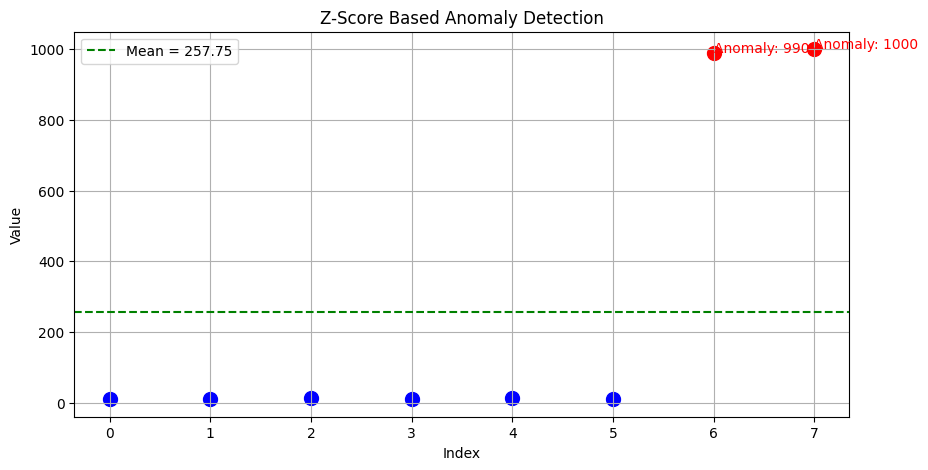

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Sample data
data = np.array([[10], [12], [13], [12], [14], [11], [990], [1000]])
df = pd.DataFrame(data, columns=['value'])

# Step 2: Z-score calculation (population std → ddof=0)
mean = df['value'].mean()
std = df['value'].std(ddof=0)
df['z_score'] = (df['value'] - mean) / std
df['anomaly'] = df['z_score'].abs() > 1.5  # threshold

# Debug: print to confirm anomaly
print(df)

# Step 3: Plot
plt.figure(figsize=(10, 5))
for idx, row in df.iterrows():
    color = 'red' if row['anomaly'] else 'blue'
    plt.scatter(idx, row['value'], color=color, s=100)

# Annotate the anomalies
for idx, row in df[df['anomaly']].iterrows():
    plt.text(idx, row['value'] + 2, f"Anomaly: {row['value']}", color='red')

# Extra plot lines
plt.axhline(y=mean, color='green', linestyle='--', label=f"Mean = {mean:.2f}")
plt.title("Z-Score Based Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
